## Exploring AirBnB in Athens

FullName: Μιχαήλ Αγγελής 

StudentId: 8200001

# Familiarizing ourselves with the Data 

So the first thing we need to do in order to get started on our tasks is to familiarize ourselves with the files we have to work with and see which of the columns and info we can extract from them. 

At initial glance we notice 2 different versions of the listings and the reviews files so lets start with those and see why they provide 2 different versions of each file. 

Lets start with the listings files and import the necessary libraries we will use in this assignment

In [70]:
import pandas as pd
import seaborn as sns
from scipy.stats import spearmanr
from scipy.stats import gaussian_kde
import folium
from folium.plugins import MarkerCluster

In [31]:
listings_detailed = pd.read_csv('../data/Detailed/listings.csv')
listings_detailed.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,10595,https://www.airbnb.com/rooms/10595,20230921043851,2023-09-21,city scrape,Condo in Athens · ★4.83 · 3 bedrooms · 5 beds ...,The apartment is 3-bedroom apartment with 2-ba...,Ampelokipi district is nice multinational and ...,https://a0.muscache.com/pictures/f7e19a44-5afe...,37177,...,4.88,4.60,4.74,00000957568,t,7,7,0,0,0.28
1,10990,https://www.airbnb.com/rooms/10990,20230921043851,2023-09-21,city scrape,Rental unit in Athens · ★4.80 · 1 bedroom · 1 ...,Athens Quality Apartments - Deluxe apartment i...,Ampelokipi district is nice multinational and ...,https://a0.muscache.com/pictures/8645179/c1728...,37177,...,4.89,4.78,4.75,00001070920,t,7,7,0,0,0.49
2,10993,https://www.airbnb.com/rooms/10993,20230921043851,2023-09-21,city scrape,Rental unit in Athens · ★4.84 · Studio · 2 bed...,The Studio is an <br />-excellent located <br ...,Ampelokipi district is nice multinational and ...,https://a0.muscache.com/pictures/107309527/848...,37177,...,4.98,4.82,4.79,00000957080,t,7,7,0,0,0.69
3,10995,https://www.airbnb.com/rooms/10995,20230921043851,2023-09-21,city scrape,Rental unit in Athens · ★4.80 · 1 bedroom · 2 ...,"AQA No2 is 1-bedroom apartment (47m2), on the ...",Ampelokipi district is nice multinational and ...,https://a0.muscache.com/pictures/6a565613-aaa3...,37177,...,4.90,4.82,4.79,00000957422,t,7,7,0,0,0.19
4,724485,https://www.airbnb.com/rooms/724485,20230921043851,2023-09-21,city scrape,Rental unit in Athens · ★4.80 · 1 bedroom · 1 ...,"Value for money in an central but not ""tourist...",Opposite the building is one of Athens main pa...,https://a0.muscache.com/pictures/miso/Hosting-...,3745284,...,4.98,4.66,4.88,00000564690,t,2,2,0,0,3.87


In [32]:
listings_summary = pd.read_csv('../data/Summary/listings.csv')
listings_summary.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,10595,Condo in Athens · ★4.83 · 3 bedrooms · 5 beds ...,37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.98863,23.76527,Entire home/apt,144,1,42,2023-09-10,0.28,7,359,8,00000957568
1,10990,Rental unit in Athens · ★4.80 · 1 bedroom · 1 ...,37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.98903,23.76448,Entire home/apt,70,1,66,2023-07-01,0.49,7,74,3,00001070920
2,10993,Rental unit in Athens · ★4.84 · Studio · 2 bed...,37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.98888,23.76473,Entire home/apt,85,1,92,2023-07-07,0.69,7,52,5,00000957080
3,10995,Rental unit in Athens · ★4.80 · 1 bedroom · 2 ...,37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.98903,23.76448,Entire home/apt,60,1,30,2023-06-02,0.19,7,73,1,00000957422
4,27262,Rental unit in Athens · ★4.81 · 1 bedroom · 1 ...,37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.98924,23.76500,Entire home/apt,85,1,21,2023-06-02,0.16,7,90,2,00000957579


Basically the disctinction in the name is accurate. 

While both of these files give us a great deal of information about the listings themselves some slight differences can be noticed.

The detailed version seems to have a lot more columns describing the listings while the summary limits the columns to the absolute necessary. 

On another note we can also see that while the price is the same in both files in the detailed version there is a $ sign appended to the float value of price resulting in being a string, while the summary gives the int value of the listing price. 

In [33]:
listings_summary['price'].dtype

dtype('int64')

In [34]:
listings_detailed['price'].dtype

dtype('O')

Having assesed them I think the way to get is to use the detailed version of the listings for our analysis and maybe the summary version will help us when visualizing the data later, as per its description.

So lets have a look now at the `neighbourhood.csv` file, since there seems to be a great deal of confusion about the `neighbourhood`, `neighbourhood_cleansed` and `neighbourhood_group` columns in the previous files.

In [35]:
neighbourhoods = pd.read_csv('../data/neighbourhoods.csv')
neighbourhoods.head()

,neighbourhood_group,neighbourhood
0,NaN,1Ο ΝΕΚΡΟΤΑΦΕΙΟ
1,NaN,ΑΓΙΟΣ ΕΛΕΥΘΕΡΙΟΣ
2,NaN,ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ
3,NaN,ΑΓΙΟΣ ΝΙΚΟΛΑΟΣ
4,NaN,ΑΚΑΔΗΜΙΑ ΠΛΑΤΩΝΟΣ


The `neighbourhood_group`column seems irrelevant since it has a lot of `NaN`.

The `neighbourhood` column seems to have the same values as the `neighbourhood_cleansed` from the detailed version of the listings file so we must be carefull when cross referencing with the `listings.csv` file in our tasks.

## Cleaning the data 

Lets have a look at the listings in relation to the price to flag and remove potential outliers.
Lets initially make a box plot to get a good first view. 

(398, 75)


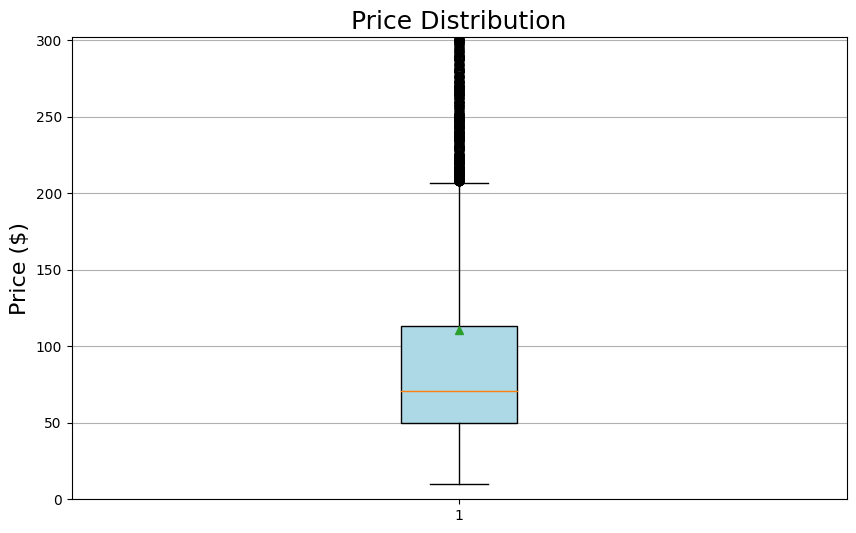

In [64]:
import matplotlib.pyplot as plt
def showInitialBoxPlot():
    # Load data
    listings = pd.read_csv('../data/Detailed/listings.csv')
    
    # Remove non-numeric characters but keep the decimal point
    listings['price'] = listings['price'].replace('[\$,]', '', regex=True).astype(float)
    
    # Calculate quartiles and IQR
    Q1 = listings['price'].quantile(0.25)
    Q3 = listings['price'].quantile(0.75)
    IQR = Q3 - Q1
    
    # Calculate y-axis limits
    lower_bound = max(0, Q1 - 1.5 * IQR)  # Ensuring lower bound is not less than 0
    upper_bound = Q3 + 3 * IQR  # Adding more space above the third quartile
    
    upper_outliers = listings[listings['price'] > upper_bound]

    print(upper_outliers.shape)
    
    # Create a box plot with more emphasis on the box
    plt.figure(figsize=(10, 6))  # Adjusting figure size for better visibility
    
    # Box plot of the prices with means indicated
    plt.boxplot(listings['price'], vert=True, showmeans=True, patch_artist=True,
                boxprops=dict(facecolor='lightblue'))  # Different color for the box
    
    # Title and labels
    plt.title('Price Distribution', fontsize=18)
    plt.ylabel('Price ($)', fontsize=16)
    
    # Setting y-axis limits to emphasize the box
    plt.ylim(lower_bound, upper_bound)
    
    # Adding grid for better readability
    plt.grid(axis='y')
    
    # Show the plot
    plt.show()

showInitialBoxPlot()

Well that's disapointing.

The box-plot doesn't seem to give us a great deal of info other than the fact that there are a lot of outliers that exceed the 75th percentile, specifically 398 (thanks to the print statement) and that there aren't any listings that have negative prices.

We can't just remove that many listings, so lets try a scatter plot and see if we get a better view.

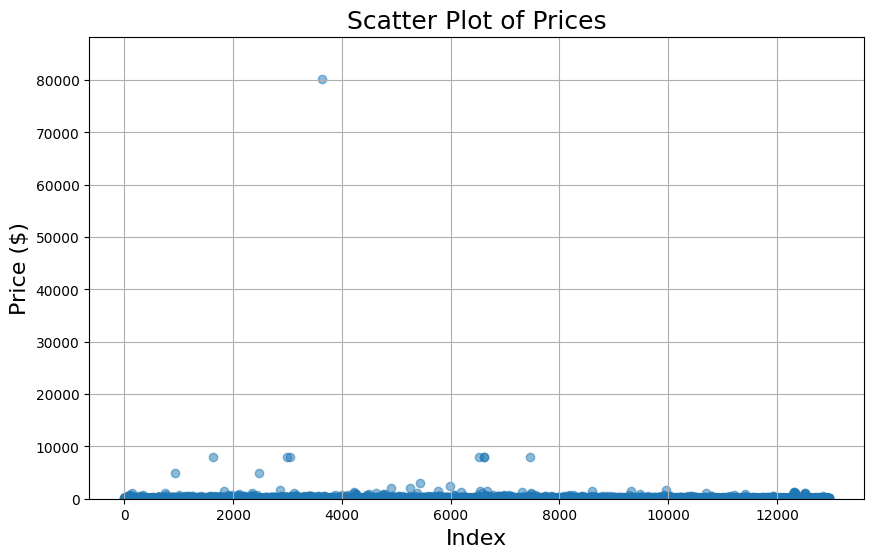

In [37]:
def showInitialScatterPlot(listings):
    
    # Remove non-numeric characters but keep the decimal point
    listings['price'] = listings['price'].replace('[\$,]', '', regex=True).astype(float)
    
    # trips = getFormattedData()
    
    max_price = listings['price'].max()
    upper_limit = max_price + (0.1 * max_price)  # Adding 10% of the max price to the upper limit for better visualization
    
    # Generate a scatter plot
    plt.figure(figsize=(10, 6))  # Adjusting figure size for better visibility
    plt.scatter(listings.index, listings['price'], alpha=0.5)  # 'alpha' is for transparency
    
    # Title and labels
    plt.title('Scatter Plot of Prices', fontsize=18)
    plt.xlabel('Index', fontsize=16)
    plt.ylabel('Price ($)', fontsize=16)
    
    # Setting y-axis limits to include outliers without excessive empty space
    plt.ylim(0, upper_limit)
    
    # Optional: Add a grid for better readability
    plt.grid(True)
    
    # Show the plot
    plt.show()

listings = pd.read_csv('../data/Detailed/listings.csv')
showInitialScatterPlot(listings)

Much better. 

While the scatter plot might not provide a detailed perspective on all listings based on price, it vividly highlights the outliers. 

To address this, we can employ the z-score method. This common statistical approach identifies and removes outliers, specifically those listings with prices that deviate significantly from the mean. For our purposes, we'll filter out listings that are more than 3 standard deviations from the average

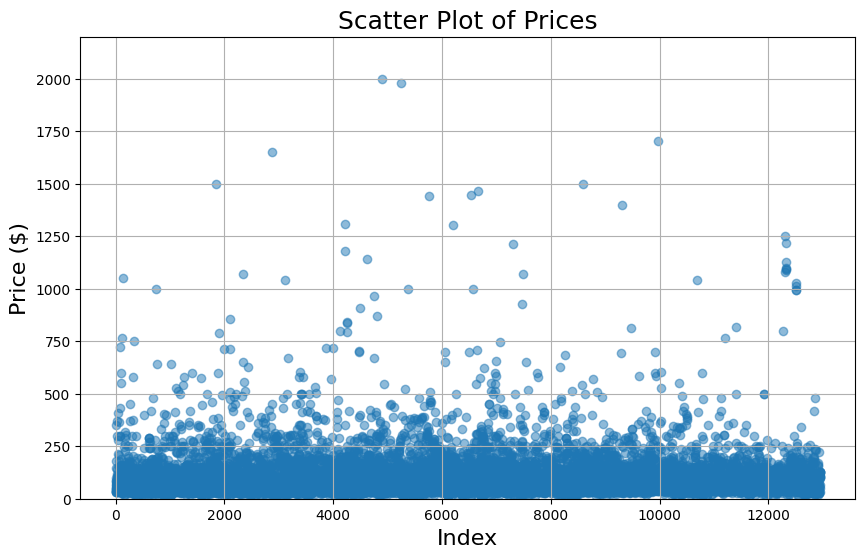

In [38]:
from scipy import stats
def getFormattedData():
    
    # Load data
    listings = pd.read_csv('../data/Detailed/listings.csv')

    # Remove non-numeric characters but keep the decimal point
    listings['price'] = listings['price'].replace('[\$,]', '', regex=True).astype(float)

    # Calculate z-scores
    listings['zscore'] = stats.zscore(listings['price'])

    # Define bounds for the outliers, a common practice is to consider values with z-scores beyond +/- 3 as outliers
    lower_bound_z = -3
    upper_bound_z = 3

    # Filter the dataframe to find values outside of the bounds
    formatted_listings = listings[(listings['zscore'] >= lower_bound_z) & (listings['zscore'] <= upper_bound_z)]

    return formatted_listings

formatted_listings = getFormattedData()
showInitialScatterPlot(formatted_listings)

The utilization of the z-score normalization is evident in the scatter plots. 

Before its application, the data was dominated by extreme outliers, causing most listings to be clustered at the lower end of prices. 

After z-score normalization, the data distribution became more cohesive, with noticeable reduction in outliers. 

This streamlined visualization facilitates a more accurate and standardized insight into price distribution, which is essential for robust and informed data analysis. 

As a result, this normalized data approach will be our standard moving forward.

## Neighbourhood Listings in Descending Order

Neighbourhood popularity can be a tricky thing.

One approach is to rank the neighbourhood based on the number of listings it contains. We will do this by grouping the listings by neighbourhood and cross referencing them with the neighbourhoods dataframe, we read from the `neighbourhoods.csv` file and adding 0 if there are no listings for a neighbourhood.

In [65]:
def listingPerNeighbourhood(formatted_listings):
    
    neighbourhoods = pd.read_csv('../data/neighbourhoods.csv')

    # Use a left merge to include all neighbourhoods, even if they aren't mentioned in the listings
    merged_data = pd.merge(neighbourhoods, formatted_listings, left_on='neighbourhood', right_on='neighbourhood_cleansed', how='left')

    # Count the number of listings in each neighbourhood. For unmentioned neighbourhoods, fill NaN with 0
    neighbourhood_counts = merged_data['neighbourhood_x'].value_counts().reindex(neighbourhoods['neighbourhood']).fillna(0).sort_values(ascending=False)    

    neighbourhood_counts_df = neighbourhood_counts.reset_index()
    neighbourhood_counts_df.columns = ['neighbourhood', 'number_of_listings']
    
    return neighbourhood_counts_df
    
formatted_listings = getFormattedData()
neighbourhood_counts = listingPerNeighbourhood(formatted_listings)
neighbourhood_counts

,neighbourhood,number_of_listings
0,ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ,2413
1,ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ,1122
2,ΝΕΟΣ ΚΟΣΜΟΣ,979
3,ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ,978
4,ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ,817
5,ΠΛΑΤΕΙΑ ΑΤΤΙΚΗΣ,583
6,ΠΑΓΚΡΑΤΙ,511
7,ΑΜΠΕΛΟΚΗΠΟΙ,452
8,ΚΟΛΩΝΑΚΙ,425
9,ΘΗΣΕΙΟ,386


Another approach is to rank the neighbourhoods based on the number of reviews each listing has, which essentially belongs to a specific neighbourhood. 

This can be achieved through the `reviewsPerNeighbourhood` function. By merging the formatted listings with the reviews dataset and subsequently grouping by the `neighbourhood_cleansed`, we are able to count and aggregate the number of reviews for each neighbourhood. 

The results are then further refined by merging with a separate neighbourhoods dataset, ensuring that all neighbourhoods are accounted for, even those without reviews.

In [40]:
def reviewsPerNeighbourhood(formatted_listings):
    
    # Load the reviews and neighbourhoods datasets
    reviews = pd.read_csv('../data/Detailed/reviews.csv')
    neighbourhoods = pd.read_csv('../data/neighbourhoods.csv')

    # Merge formatted_listings with reviews
    merged_data = pd.merge(formatted_listings, reviews, left_on='id',
                           right_on='listing_id', how='left')

    # Group by 'neighbourhood_cleansed' and count the number of reviews for each neighbourhood
    review_counts_per_neighbourhood = merged_data.groupby('neighbourhood_cleansed')['id_y'].count()

    # Convert the Series to DataFrame and reset the index for merging
    review_counts_df = review_counts_per_neighbourhood.reset_index()
    review_counts_df.rename(columns={'neighbourhood_cleansed': 'neighbourhood', 'id_y': 'review_count'}, inplace=True)

    # Merge with neighbourhoods dataframe to include all neighbourhoods
    result = pd.merge(neighbourhoods, review_counts_df, on='neighbourhood', how='left')

    # Fill NaN values with 0 for neighbourhoods with no reviews
    result['review_count'].fillna(0, inplace=True)

    # Remove the 'neighbourhood_group' as it is of no interest to us
    result.drop('neighbourhood_group', axis=1, inplace=True)

    # Sort by review counts in descending order
    result = result.sort_values(by='review_count', ascending=False)

    result.reset_index()

    return result

formatted_listings = getFormattedData()
review_counts = reviewsPerNeighbourhood(formatted_listings)
review_counts

,neighbourhood,review_count
15,ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ,155749.0
23,ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ,75216.0
28,ΝΕΟΣ ΚΟΣΜΟΣ,47480.0
2,ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ,37690.0
26,ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ,37591.0
5,ΑΚΡΟΠΟΛΗ,28096.0
17,ΘΗΣΕΙΟ,28087.0
19,ΚΕΡΑΜΕΙΚΟΣ,19722.0
30,ΠΑΓΚΡΑΤΙ,19022.0
36,ΠΛΑΤΕΙΑ ΑΤΤΙΚΗΣ,17754.0


The `compareNeighbourhoodRankings` function merges rankings of neighbourhoods by listing count and review count, assigns ranks to each metric, and then calculates their Spearman's rank correlation. 

By comparing the two rankings with this statistical method, it quantifies the relationship between neighbourhood popularity based on listings and reviews. 

Using prior functions, we extract the required data and compute this correlation coefficient.

In [67]:
def compareNeighbourhoodRankings(ranking_per_listings, ranking_per_reviews):
    # Merge the two dataframes on the neighbourhood
    merged_df = pd.merge(ranking_per_listings, ranking_per_reviews, on='neighbourhood', how='outer')
    
    # Fill any NaN values with 0, in case some neighbourhoods don't have listings or reviews
    merged_df.fillna(0, inplace=True)
    
    # Rank each neighbourhood based on the two metrics
    merged_df['listings_rank'] = merged_df['number_of_listings'].rank(ascending=False)
    merged_df['reviews_rank'] = merged_df['review_count'].rank(ascending=False)
    
    # Calculate Spearman's rank correlation
    correlation, _ = spearmanr(merged_df['listings_rank'], merged_df['reviews_rank'])
    return correlation


formatted_listings = getFormattedData()
ranking_per_listings = listingPerNeighbourhood(formatted_listings)
ranking_per_reviews = reviewsPerNeighbourhood(formatted_listings)
correlation = compareNeighbourhoodRankings(ranking_per_listings, ranking_per_reviews)
correlation

0.9502602300086833

A Spearman's rank correlation coefficient of 0.95026 indicates a strong positive association between the rankings of neighbourhoods based on listing counts and review counts. 

This high value suggests that neighbourhoods with more listings generally also receive more reviews, showcasing a consistent trend in popularity across both metrics.

Neighbourhood Prices in Descending Order

The function `getMetrics` calculates statistical metrics on listing prices by neighbourhood. 

It first merges the input listings with a predefined neighbourhoods dataset. After ensuring price values are numerical, it groups data by neighbourhood, extracting the median, mean, standard deviation, and count of listings. 

The result is a sorted dataframe of price statistics per neighbourhood, in descending value of the median.

In [42]:
def getMetrics(listings):

    neighbourhoods = pd.read_csv('../data/neighbourhoods.csv')

    # Rename the 'neighbourhood' column in the neighbourhoods DataFrame for consistency
    neighbourhoods.rename(columns={'neighbourhood': 'neighbourhood_cleansed'}, inplace=True)

    # Merge the datasets on the 'neighbourhood_cleansed' column
    merged_data = pd.merge(listings, neighbourhoods, on='neighbourhood_cleansed', how='inner')

    # Convert price to a numerical value, removing any non-numerical characters if necessary
    merged_data['price'] = merged_data['price'].replace('[\$,]', '', regex=True).astype(float)

    # Create a grouping by 'neighbourhood_cleansed' and calculate the desired statistics
    price_stats = merged_data.groupby('neighbourhood_cleansed')['price'].agg(['median', 'mean', 'std', 'count'])

    # Rename the 'count' column to 'number_of_listings'
    price_stats.rename(columns={'count': 'number_of_listings'}, inplace=True)

    # Sort the DataFrame by median price in descending order
    price_stats = price_stats.sort_values('median', ascending=False)

    return price_stats

formatted_listings = getFormattedData()
metrics = getMetrics(formatted_listings)
metrics

,median,mean,std,number_of_listings
neighbourhood_cleansed,,,,
ΡΗΓΙΛΛΗΣ,120.0,367.800000,578.622675,5
ΖΑΠΠΕΙΟ,114.0,175.468750,176.111276,160
ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ,104.0,134.236220,119.319834,2413
ΑΚΡΟΠΟΛΗ,100.0,134.211488,128.169389,383
ΚΟΛΩΝΑΚΙ,100.0,128.595294,104.431349,425
ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ,90.5,120.284314,104.613533,1122
ΘΗΣΕΙΟ,90.0,126.492228,124.176775,386
ΚΕΡΑΜΕΙΚΟΣ,89.0,123.883382,136.367487,343
ΛΥΚΑΒΗΤΤΟΣ,75.0,104.561728,87.859850,162


## Availability per Day

The new file we will be using for this task will be the `calendar.csv` file, so let's have a look at what we are dealing with.

In [43]:
calendar_listings = pd.read_csv('../data/Detailed/calendar.csv')
calendar_listings.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,10595,2023-09-21,f,$150.00,$60.00,1,180
1,10595,2023-09-22,t,$150.00,$60.00,1,180
2,10595,2023-09-23,t,$150.00,$75.00,1,180
3,10595,2023-09-24,t,$150.00,$90.00,1,180
4,10595,2023-09-25,f,$300.00,$210.00,1,180


The columns we will focus on and use in the following functions will be the `date` and the `available` column, which show for a specific date if the listing is available or not.

The `getAvailability` function examines the daily availability of listings. After loading the calendar dataset, it filters only available listings and then merges with a formatted dataset. The result is a daily count of available listings, spanning from the earliest to the latest date in the dataset. This provides a timeline of how listing availability changes over time.

The `createAvailabilityPlot` generates a line plot that provides a clear view of the listing availabilty trends over time. Date labels are neatly formatted and set to display once a month, ensuring clarity even with a dense dataset. The rotation of date labels further ensures readability

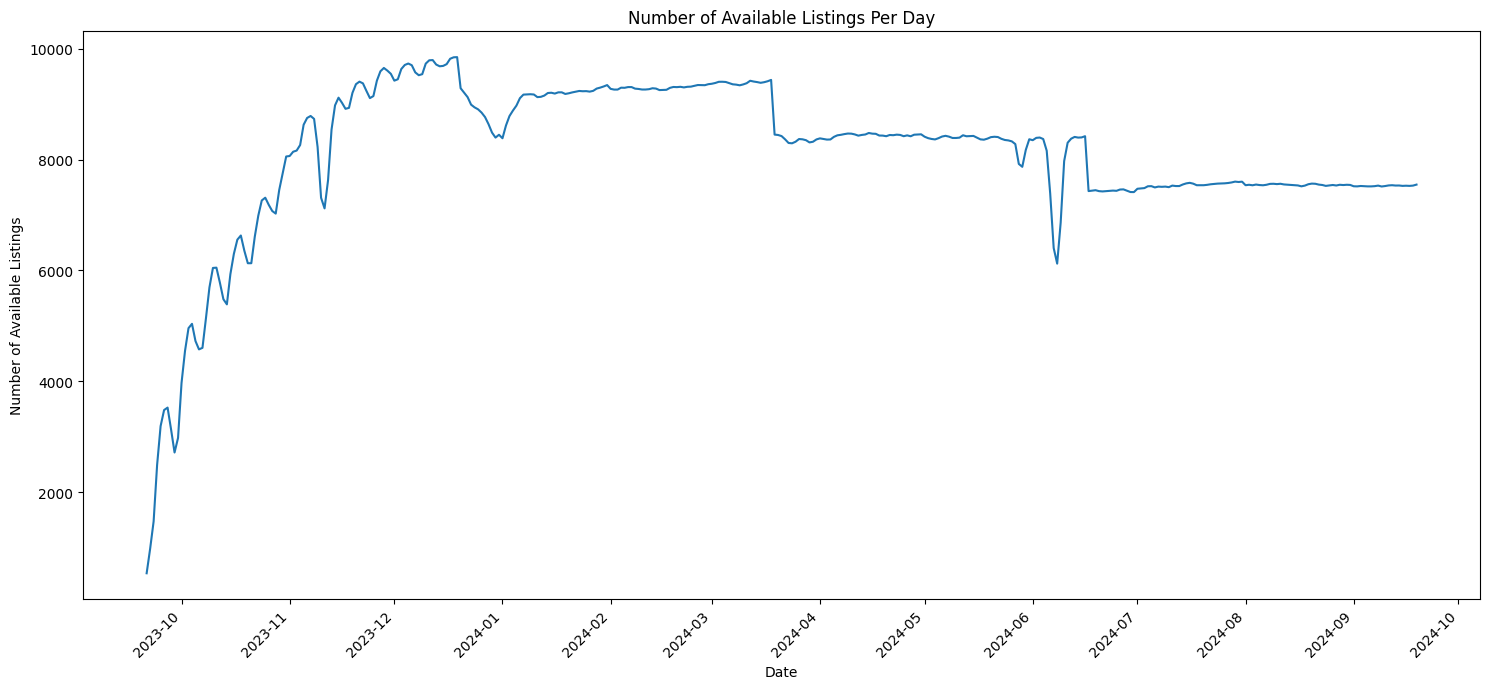

In [44]:
import matplotlib.dates as mdates

def getAvailability(formatted_listings):

    # Read the data
    availability = pd.read_csv('../data/Detailed/calendar.csv')

    availability['date'] = pd.to_datetime(availability['date'])

    # Filter to only include available listings
    available_listings = availability[availability['available'] == 't']

    formatted_listings.rename(columns={'id': 'listing_id'}, inplace=True)

    # Merge the dataframes on 'listing_id' to ensure we're comparing the same listings
    merged_data = pd.merge(formatted_listings, available_listings, on='listing_id', suffixes=('_listings', '_calendar'))

    # Keep the columns we are intrested in
    selected_data = merged_data[['listing_id', 'date']]

    # Count the number of listings available each day
    available_per_day = selected_data.groupby('date').size().sort_index()

    return available_per_day

def createAvailabilityPlot(available_per_day):
    # Create a plot
    plt.figure(figsize=(15, 7))

    # Plot the data
    available_per_day.plot(kind='line', x_compat=True)

    # Set the title and labels
    plt.title('Number of Available Listings Per Day')
    plt.xlabel('Date')
    plt.ylabel('Number of Available Listings')

    # Create a date formatter
    date_form = mdates.DateFormatter("%Y-%m")
    # Get the current axes
    ax = plt.gca()
    # Apply the formatter
    ax.xaxis.set_major_formatter(date_form)

    # Ensure a major tick for each week using (interval=1)
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

    # Rotate date labels if they overlap
    plt.xticks(rotation=45)

    # Show the plot
    plt.tight_layout()
    plt.show()


formatted_listings = getFormattedData()
available_per_day = getAvailability(formatted_listings)
createAvailabilityPlot(available_per_day)


The graph showcases the daily availability of listings over a given period. 

A noticeable trend is the fluctuations during specific times of the year. 

During the Christmas period, there's a visible decline in available listings, suggesting a high demand or reduced supply, possibly due to hosts utilizing their properties for personal use or increased bookings. 

The same pattern appears around the Easter period. 

However, the most significant dip is observed during the summer months. This stark reduction in availability can be attributed to the peak travel season where a large number of travelers might be booking accommodations, combined with potential hosts vacationing themselves. 

## Reviews, Occupacy per Listing, Average Income

# Reviews Histogramm

The `plotListingsOccupancy` function visualizes the distribution of reviews for listings. It showcases how many listings fall within certain review counts, using bins of 100 reviews. The histogram provides a clear representation, with each bar spanning 100 reviews, from the minimum to a rounded maximum review count. This ensures that the x-axis ticks are well-spaced and easy to read. The function aims to give insight into the popularity and occupancy of listings based on the number of reviews they've received.

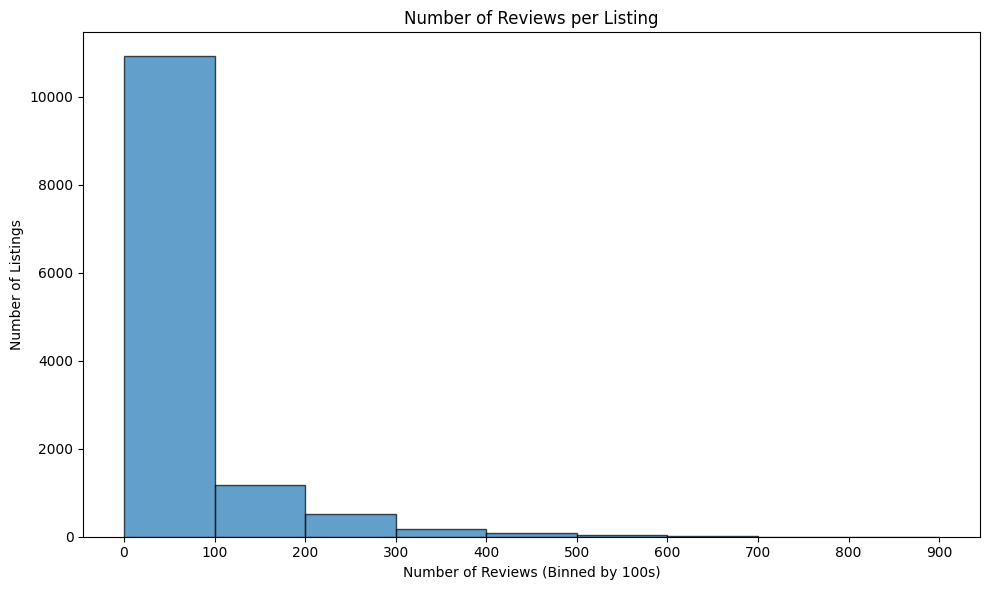

In [45]:
def plotlListingsReviews(listings):

    # Determine the range of reviews
    min_reviews = listings['number_of_reviews'].min()
    max_reviews = listings['number_of_reviews'].max()

    # Round up the maximum reviews to the nearest hundred
    max_reviews_rounded = (max_reviews + 99) // 100 * 100

    # Create bins from minimum to the rounded-up maximum
    bins = list(range(min_reviews, max_reviews_rounded + 1, 100))

    # Plot the histogram
    plt.figure(figsize=(10, 6))
    plt.hist(listings['number_of_reviews'], bins=bins, edgecolor='k', alpha=0.7)

    # Set the title and labels
    plt.title('Number of Reviews per Listing')
    plt.xlabel('Number of Reviews (Binned by 100s)')
    plt.ylabel('Number of Listings')

    # Adjust the x-axis ticks
    plt.xticks(list(range(0, max_reviews_rounded + 1, 100)))

    plt.tight_layout()
    plt.show()

formatted_listings = getFormattedData()
plotlListingsReviews(formatted_listings)

Given the data distribution in our histogram, it's evident that the last few bins contain significantly fewer listings compared to the first bins. This makes it challenging to visualize the exact counts for these bins using a regular linear scale.

To overcome this visualization challenge and provide clarity, we can use a logarithmic scale for the y-axis to get a better view for the last bins.

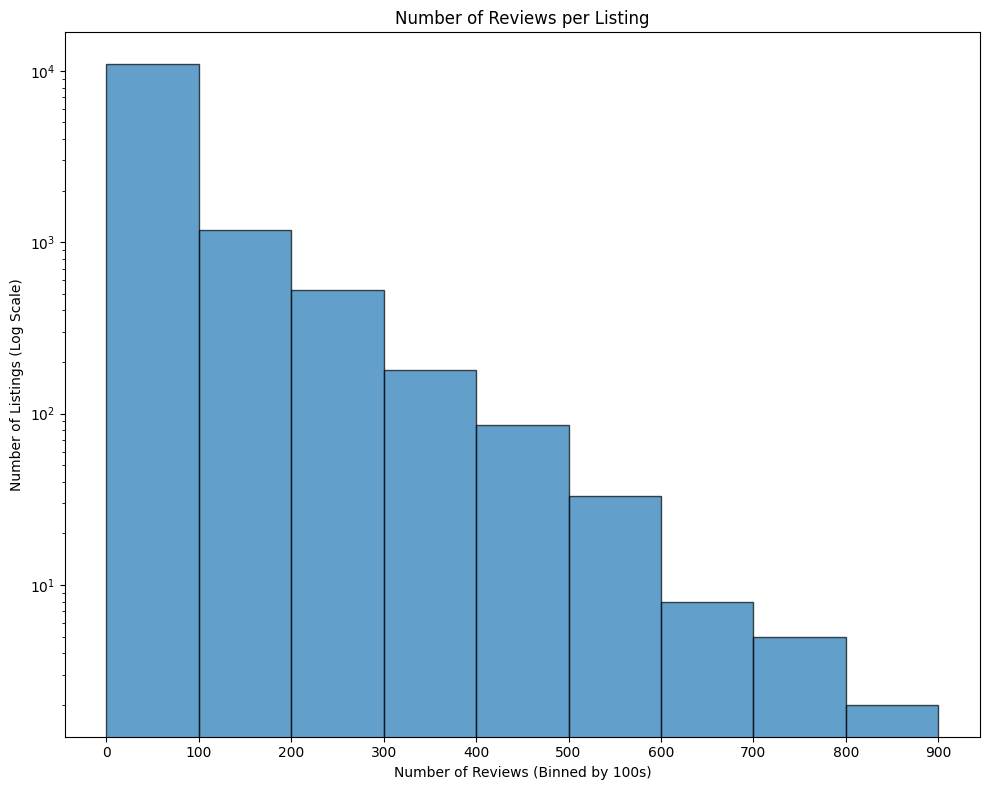

In [46]:
def plotListingsOccupancyLogScale(listings):

    # Determine the range of reviews
    min_reviews = listings['number_of_reviews'].min()
    max_reviews = listings['number_of_reviews'].max()

    # Round up the maximum reviews to the nearest hundred
    max_reviews_rounded = (max_reviews + 99) // 100 * 100

    # Create bins from minimum to the rounded-up maximum
    bins = list(range(min_reviews, max_reviews_rounded + 1, 100))

    # Plot the histogram
    plt.figure(figsize=(10, 8))  # Increased figure height
    plt.hist(listings['number_of_reviews'], bins=bins, edgecolor='k', alpha=0.7, log=True)  # Set log=True

    # Set the title and labels
    plt.title('Number of Reviews per Listing')
    plt.xlabel('Number of Reviews (Binned by 100s)')
    plt.ylabel('Number of Listings (Log Scale)')

    # Adjust the x-axis
    plt.xticks(list(range(0, max_reviews_rounded + 1, 100)))

    # Setting the y-axis to have ticks for every 1000's and then setting it to a logarithmic scale
    max_y_value = (listings['number_of_reviews'].value_counts().max() + 999) // 1000 * 1000
    plt.yticks(list(range(0, max_y_value + 1, 1000)))
    plt.yscale('log')

    plt.tight_layout()
    plt.show()

formatted_listings = getFormattedData()
plotListingsOccupancyLogScale(formatted_listings)

# Occupacy per Listing per Month & Average Income

The `calculateAverageOccupancy` function uses the `reviews_per_month` column of the listings dataframe and calculates the average monthly occupancy rate by determining the mean of reviews per month for every listing, then multiplying this value by 6, under the assumption that 2 bookings equate to 1 review and that a booking equates to 3 nights stay.

Average Income

The `calculateAverageIncome` function calculates the average monthly income for a listing. It accepts the average occupancy as a parameter from the previous function and after it calculates the mean listing price it returns their multiplication.

In [47]:
def calculateAverageOccupancy(listings):

    # Multiply by 2 because of the assumption that 1 review result in 2 booking
    # Multiply by 3 because of the assumption that 1 booking lasts for 3 days 
    average_occupacy = listings['reviews_per_month'].mean() * 2 * 3

    return average_occupacy

def calculateAverageIncome(formatted_listings, average_occupacy):

    average_price = formatted_listings['price'].mean()

    return average_occupacy * average_price

formatted_listings = getFormattedData()

average_occupacy = calculateAverageOccupancy(formatted_listings)
average_income = calculateAverageIncome(formatted_listings, average_occupacy)

print(f'The average occupancy for a listing is {average_occupacy}')
print(f'The average income for a listing is {average_income}')

The average occupancy for a listing is 10.782990535129233
The average income for a listing is 1065.8156779293356


However the `calculateAverageOccupancy` function relies heavily on the `reviews_per_month` column from the listings dataset to calculate average occupancy and though it might be a simplistic approach, it can be problematic due to a few reasons.

By solely relying on the `reviews_per_month` column, we're placing our trust in one singular data point without cross-referencing its accuracy against the more granular reviews data.

Also it might not capture the dynamics of reviews for every month. For instance, there might be months without any reviews, and this method does not account for such gaps.

Lastly the data in `reviews_per_month` might have been aggregated at a different point in time or using a different method, leading to potential inconsistencies when compared to actual review records.

To attain a more precise understanding of monthly reviews for each listing, we developed the `getReviewsPerMonth` and `getAverageReviews` functions. 

Initially, `getReviewsPerMonth` loads the reviews, formats them monthly, and ensures every month is captured for each listing, even if no reviews were made. 

Subsequently, `getAverageReviews` calculates the monthly average for these reviews and compares it to the `reviews_per_month` from the listings dataset. 

This approach ensures a thorough analysis by cross-referencing detailed review records, thus enhancing the accuracy and integrity of our data-driven insights.

In [48]:
def getReviewsPerMonth():

    reviews = pd.read_csv('../data/Detailed/reviews.csv', parse_dates=['date'])
    
    reviews['year_month'] = pd.to_datetime(reviews['date']).dt.to_period('M')
    
    # Getting the min and max date for each listing
    min_max_dates = reviews.groupby('listing_id').agg(min_date=('year_month', 'min'), max_date=('year_month', 'max')).reset_index()
    
    # Creating a DataFrame with all months between min and max for each listing
    all_dates = []
    for _, row in min_max_dates.iterrows():
        date_range = pd.period_range(start=row['min_date'], end=row['max_date'], freq='M')
        all_dates.extend([(row['listing_id'], date) for date in date_range])
    
    all_dates_df = pd.DataFrame(all_dates, columns=['listing_id', 'year_month'])
    
    # Merge to get review counts; NaN values will be months with no reviews
    monthly_reviews = pd.merge(all_dates_df, reviews.groupby(['listing_id', 'year_month']).size().reset_index(name='reviews_count'), on=['listing_id', 'year_month'], how='left').fillna(0)
    
    return monthly_reviews


def getAverageReviews(listings, monthly_reviews):
    avg_reviews = monthly_reviews.groupby('listing_id')['reviews_count'].mean().reset_index()
    avg_reviews.rename(columns={'reviews_count': 'average_monthly_reviews'}, inplace=True)
    
    # Merge with listings to get reviews_per_month with a left join
    result_df = pd.merge(listings[['id', 'reviews_per_month']], avg_reviews, left_on='id', right_on='listing_id', how='left')
    
    # Fill NaN values in 'average_monthly_reviews' with 0
    result_df['average_monthly_reviews'].fillna(0, inplace=True)

    # Fill NaN values in 'reviews_per_month' with 0
    result_df['reviews_per_month'].fillna(0, inplace=True)
    
    # Convert 'id' to integer type
    result_df['id'] = result_df['id'].astype(int)
    
    result_df.drop(columns=['listing_id'], inplace=True)
    
    return result_df

listings = getFormattedData()
monthly_reviews = getReviewsPerMonth()
result = getAverageReviews(listings, monthly_reviews)

result.head()

,id,reviews_per_month,average_monthly_reviews
0,10595,0.28,0.281879
1,10990,0.49,0.503817
2,10993,0.69,0.702290
3,10995,0.19,0.192308
4,724485,3.87,3.893939


Although the function is comprehensive and we get a close estimate to the 2 columns, it tends to misrepresent the average reviews for listings that haven't been active for a full year. It merely averages the reviews for the months the listing has been active, without normalizing over a 12-month span. 

For instance, a listing active for just 6 months with a total of 24 reviews would depict an average of 4 reviews/month. While accurate for its activity duration, this isn't representative when making yearly comparisons across all listings.

In [49]:
def getAverageReviews(listings, monthly_reviews):
    # Calculate the total number of reviews for each listing
    total_reviews = monthly_reviews.groupby('listing_id')['reviews_count'].sum().reset_index()
    total_reviews.rename(columns={'reviews_count': 'total_reviews'}, inplace=True)
    
    # Calculate average monthly reviews by dividing total reviews by 12
    total_reviews['average_monthly_reviews'] = total_reviews['total_reviews'] / 12
    
    # Merge with listings to get reviews_per_month with a left join
    result_df = pd.merge(listings[['id', 'reviews_per_month']], total_reviews, left_on='id', right_on='listing_id', how='left')
    
    # Fill NaN values in 'average_monthly_reviews' with 0
    result_df['average_monthly_reviews'].fillna(0, inplace=True)

    # Fill NaN values in 'reviews_per_month' with 0
    result_df['reviews_per_month'].fillna(0, inplace=True)
    
    # Convert 'id' to integer type
    result_df['id'] = result_df['id'].astype(int)
    
    result_df.drop(columns=['listing_id', 'total_reviews'], inplace=True)
    
    return result_df

listings = getFormattedData()
monthly_reviews = getReviewsPerMonth()
result = getAverageReviews(listings, monthly_reviews)
result.head()

,id,reviews_per_month,average_monthly_reviews
0,10595,0.28,3.500000
1,10990,0.49,5.500000
2,10993,0.69,7.666667
3,10995,0.19,2.500000
4,724485,3.87,42.833333


Our revised `getAverageReviews` takes a more holistic view. By summing all the reviews for each listing and then dividing by 12, it provides a standardized average monthly review metric across a year, regardless of the listing's activity duration.

This nuanced approach ensures a leveled playing field for all listings when evaluating their performance, as we can see from the corrected `average_monthly_reviews` column we get from the revised function.

In [50]:
def calculateAverageOccupancyRevised(listings):

    # Multiply by 2 because of the assumption that 1 review result in 2 booking
    # Multiply by 3 because of the assumption that 1 booking lasts for 3 days 
    average_occupacy = listings['average_monthly_reviews'].mean() * 2 * 3

    return average_occupacy

def calculateAverageIncomeRevised(formatted_listings, average_occupacy):

    average_price = formatted_listings['price'].mean()

    return average_occupacy * average_price

listings = getFormattedData()
monthly_reviews = getReviewsPerMonth()
result = getAverageReviews(listings, monthly_reviews)

average_occupacy_revised = calculateAverageOccupancyRevised(result)
average_income_revised = calculateAverageIncomeRevised(listings, average_occupacy_revised)

print(f'The average occupancy for a listing is {average_occupacy_revised}')
print(f'The average income for a listing is {average_income_revised}')

The average occupancy for a listing is 24.352313992119292
The average income for a listing is 2407.0389343384136


We can even go a step further in this process because some listings appear to have an occupacy exceeding the 30 day mark.

In the `calculateAverageOccupancyRevised` function, we compute the estimated occupancy for each listing based on reviews and bookings. However, to keep figures realistic, any listing with an occupancy exceeding 30 days are capped at 30. This ensures our average occupancy across listings remains grounded and accurate.

In [51]:
def calculateAverageOccupancyRevisited(listings):

    # Multiply by 2 because of the assumption that 1 reviews result in 2 booking
    # Multiply by 3 because of the assumption that 1 booking lasts for 3 days 
    listings['estimated_occupacy'] = listings['average_monthly_reviews'] * 2 * 3
    
    # Cap each listing's estimated occupancy at 30 days
    listings['estimated_occupacy'] = listings['estimated_occupacy'].apply(lambda x: min(x, 30))
    
    # Calculate the average occupancy across all listings
    average_occupacy = listings['estimated_occupacy'].mean()

    return average_occupacy

listings = getFormattedData()
monthly_reviews = getReviewsPerMonth()
result = getAverageReviews(listings, monthly_reviews)

average_occupacy_revisited = calculateAverageOccupancyRevisited(result)
average_income_revised = calculateAverageIncomeRevised(listings, average_occupacy_revisited)

print(f'The average occupancy for a listing is {average_occupacy_revisited}')
print(f'The average income for a listing is {average_income_revised}')

The average occupancy for a listing is 12.049370316000926
The average income for a listing is 1190.9875790145284


## Listings per Room Type

To calculate the number of listings per room type, in absolute numbers, and also in percentages we will use a function called `calculateListingsPerRoomType` that computes the number of listings for each room type using the `value_counts()` method of the pandas DataFrame. 

Further more the fucntion also calculates the percentage representation of each room type based on the total number of listings.

In [52]:
def calculateListingsPerRoomType(formatted_listings):

    # Count the number of listings per room type
    room_type_counts = formatted_listings['room_type'].value_counts().reset_index()
    room_type_counts.columns = ['room_type', 'number_of_listings']

    # Calculate the percentage of total listings for each room type
    total_listings = formatted_listings.shape[0]
    room_type_counts['percentage'] = (room_type_counts['number_of_listings'] / total_listings) * 100

    return room_type_counts


formatted_listings = getFormattedData()
room_type_counts = calculateListingsPerRoomType(formatted_listings)
room_type_counts


,room_type,number_of_listings,percentage
0,Entire home/apt,11643,89.955961
1,Private room,1111,8.583790
2,Hotel room,104,0.803523
3,Shared room,85,0.656726


The `calculateListingsPerNeighbourhoodAndRoomType` function operates on the same dataset but goes a step further. It groups the listings by both neighbourhood and room type, and then counts the number of listings falling under each specific combination. This provides a more granular view of the distribution of listings across different neighbourhoods and room types. Finally we also sort the returned dataframe by room-type.

In [53]:
def calculateListingsPerNeighbourhoodAndRoomType(formatted_listings):

    # Group by neighbourhood and room type, then count the number of listings for each combination
    neighbourhood_room_type_counts = formatted_listings.groupby(['neighbourhood_cleansed', 'room_type']).size().reset_index(name='number_of_listings')
    
    # Sort the DataFrame by the 'neighbourhood_cleansed' column
    neighbourhood_room_type_counts = neighbourhood_room_type_counts.sort_values(by='neighbourhood_cleansed')

    return neighbourhood_room_type_counts

formatted_listings = getFormattedData()
neighbourhood_room_type = calculateListingsPerNeighbourhoodAndRoomType(formatted_listings)
neighbourhood_room_type

,neighbourhood_cleansed,room_type,number_of_listings
0,1Ο ΝΕΚΡΟΤΑΦΕΙΟ,Entire home/apt,55
1,ΑΓΙΟΣ ΕΛΕΥΘΕΡΙΟΣ,Entire home/apt,33
2,ΑΓΙΟΣ ΕΛΕΥΘΕΡΙΟΣ,Private room,5
3,ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ,Entire home/apt,686
4,ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ,Hotel room,4
...,...,...,...
105,ΣΤΑΔΙΟ,Entire home/apt,241
108,ΣΤΑΘΜΟΣ ΛΑΡΙΣΗΣ,Hotel room,4
109,ΣΤΑΘΜΟΣ ΛΑΡΙΣΗΣ,Private room,4
107,ΣΤΑΘΜΟΣ ΛΑΡΙΣΗΣ,Entire home/apt,73


## Prices Per Day 

For this task we will use the `calendar.csv` file, which provides the daily price for various listings. To narrow down our focus, we only retain listings that are also present in `formatted_listings`, our curated set of clean data. The `loadAndFilterData` function reads the original dataset and filters it to match our criteria, ensuring we work only with relevant listings.

Once we have our filtered dataset, the next step is to clean and compute the average daily price for each listing. The `averagePricePerDay` function helps us with this task. It first cleans the price column by removing any non-numeric characters, and then processes the data to calculate the average daily price for each listing. The result is a DataFrame that provides a clear view of the daily pricing trend for each listing.

However a dataframe containings the average daily price of every listings can be messy, so we can use the `weekly_avg_price_trend` function to visualize the weekly average prices trend for the given listings. 

Initially, it ensures that the `date` column in the input DataFrame is of type datetime. It then determines the start of the week for each date and groups the data by this starting week. The mean price for each week is calculated, and the resulting trend is plotted against the weeks. 

The X-axis displays the months for better clarity, while the Y-axis represents the mean average prices for each week. The plot provides insights into the fluctuations in listing prices on a week-to-week basis, which can be essential for identifying patterns or peak demand periods, over the years.

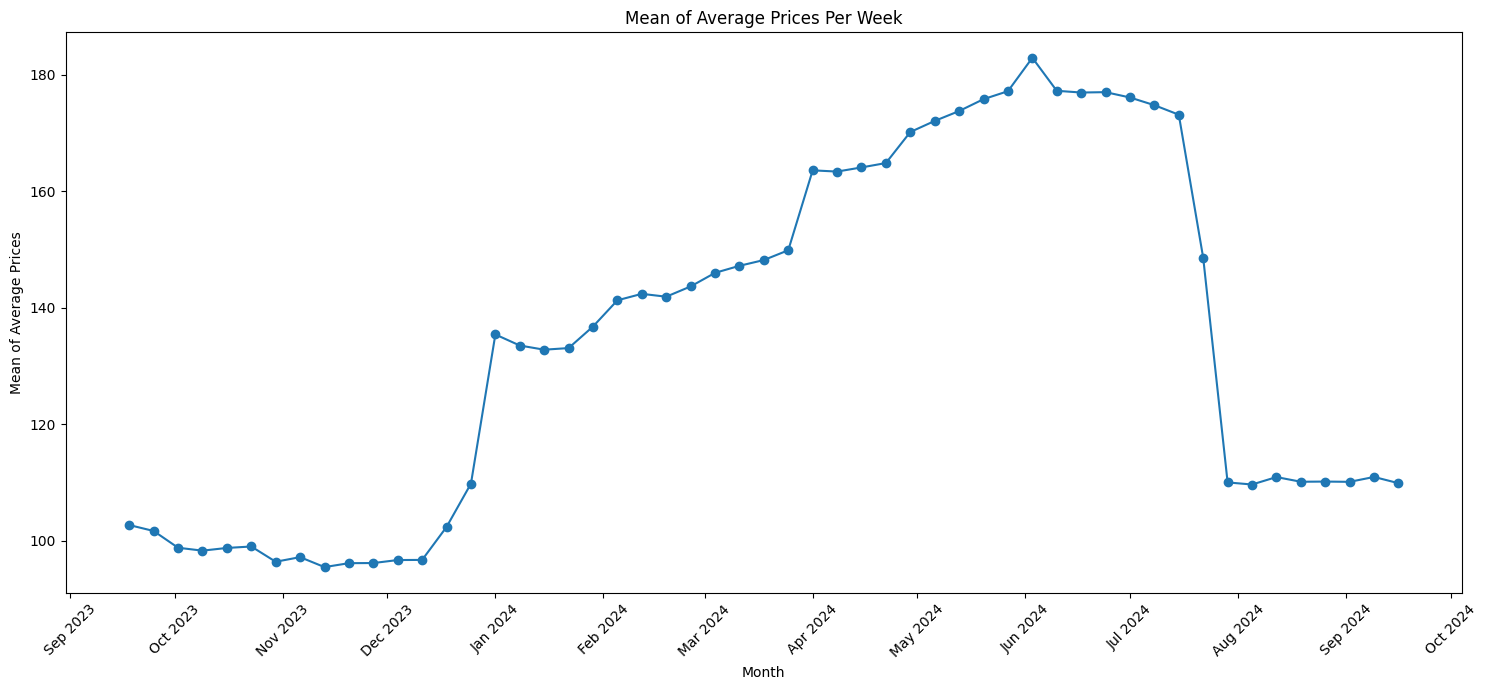

In [54]:
def loadAndFilterData():

    all_listings = pd.read_csv('../data/Detailed/calendar.csv')
    formatted_listings = getFormattedData()

    # Keep only the listings that are in formatted_listings
    filtered_listings = all_listings[all_listings['listing_id'].isin(formatted_listings['id'])]

    return filtered_listings


def averagePricePerDay(df):
    # Convert price column to numeric type
    df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)

    # Group by listing_id and date to calculate average price
    avg_prices = df.groupby(['listing_id', 'date'])['price'].mean().reset_index()

    return avg_prices

def weekly_avg_price_trend(avg_prices_df):

    # Convert the 'date' column to datetime type (if not already)
    avg_prices_df['date'] = pd.to_datetime(avg_prices_df['date'])

    # Extract the starting day of the week and group by it to get the mean average price
    avg_prices_df['week_start'] = avg_prices_df['date'] - pd.to_timedelta(avg_prices_df['date'].dt.dayofweek, unit='d')
    weekly_avg = avg_prices_df.groupby('week_start')['price'].mean().reset_index()

    # Create a plot
    plt.figure(figsize=(15, 7))

    # Plot the data
    plt.plot(weekly_avg['week_start'], weekly_avg['price'], marker='o')

    # Set the title and labels
    plt.title('Mean of Average Prices Per Week')
    plt.xlabel('Month')
    plt.ylabel('Mean of Average Prices')

    # Adjust x-axis to show month
    ax = plt.gca()
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

    # Rotate date labels for better visualization
    plt.xticks(rotation=45)

    # Show the plot
    plt.tight_layout()
    plt.show()


filtered_listings = loadAndFilterData()
avg_prices = averagePricePerDay(filtered_listings)
weekly_avg_price_trend(avg_prices)

The plot showcases the evolution of average prices over time for the listings. Upon observation:

**Christmas Seasonal Increase**
Notably, there is a significant upward trend in the average prices starting from late November and peaking in December. This suggests that the Christmas holiday season sees a surge in demand, leading to higher listing prices.

**Easter Peak** 
Another noticeable rise in prices can be seen around April, aligning with the Easter holiday period. This indicates that Easter is also a favorable time for listings, leading to a seasonal price increase.

**Summer Demand** 
From May to August, the average prices steadily climb, reaching a peak in June. This suggests that the summer months, especially mid-June, are a high-demand period for listings, possibly due to vacation travels and tourism.

**Post-Summer Decline** 
Following the summer period, there is a sharp decline in the average prices as we move into September. This could be attributed to the end of the popular summer vacation period, leading to reduced demand and consequently, a decrease in listing prices.

If we want to get a bit more detail about our daily averages of prices per listings we can use the function `daily_avg_price_trend`. 

It groups the data by each date and calculates the mean price for that date. The trend is then plotted against the individual dates, by having the scale be in months to ensure readibility. This approach allows us to see daily fluctuations in listing prices, which can be especially useful for spotting patterns like weekend spikes.

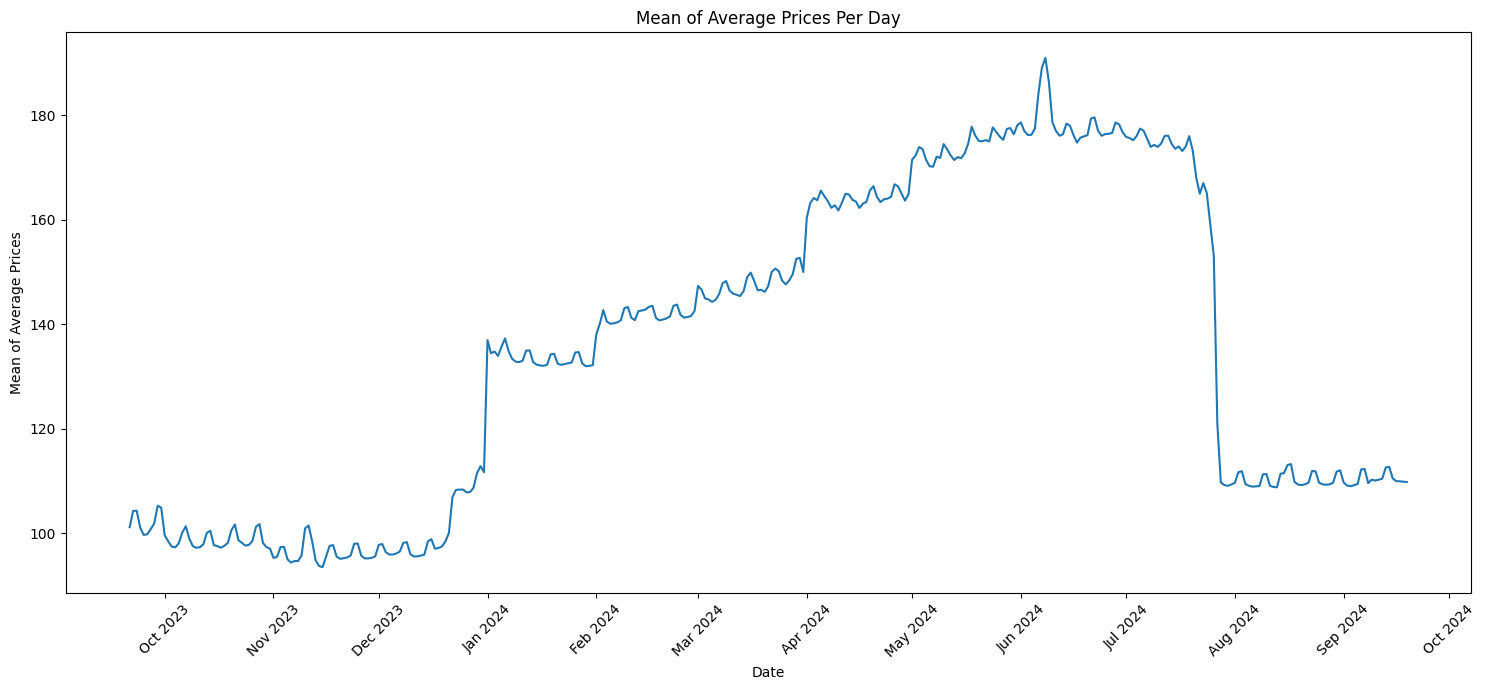

In [55]:
def daily_avg_price_trend(avg_prices_df):

    # Convert the 'date' column to datetime type (if not already)
    avg_prices_df['date'] = pd.to_datetime(avg_prices_df['date'])

    # Group by date to get the mean average price for each day
    daily_avg = avg_prices_df.groupby('date')['price'].mean().reset_index()

    # Create a plot
    plt.figure(figsize=(15, 7))

    # Plot the data
    plt.plot(daily_avg['date'], daily_avg['price'], linestyle='-', marker='')

    # Set the title and labels
    plt.title('Mean of Average Prices Per Day')
    plt.xlabel('Date')
    plt.ylabel('Mean of Average Prices')

    # Adjust x-axis to show month
    ax = plt.gca()
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

    # Rotate date labels for better visualization
    plt.xticks(rotation=45)

    # Show the plot
    plt.tight_layout()
    plt.show()

filtered_listings = loadAndFilterData()
avg_prices = averagePricePerDay(filtered_listings)
daily_avg_price_trend(avg_prices)

## Listings per Host

The `calculateListingsPerHost` function computes the number of listings associated with each host in the clean dataset. 

Specifically, it counts the occurrences of each host_id to determine how many listings they have. The function then sorts the hosts in descending order based on the number of their listings, allowing us to easily identify the hosts with the most properties. 

This information can provide insights into the distribution of listings across hosts, highlighting if there are any superhosts or entities with a significant number of listings on the platform.

In [56]:
def calculateListingsPerHost(formatted_listings):

    # Count the number of listings per room type
    room_counts = formatted_listings['host_id'].value_counts().reset_index()
    room_counts.columns = ['host_id', 'number_of_listings']

    room_counts = room_counts.sort_values(by='number_of_listings', ascending=False)

    return room_counts

The function `plot_distribution_of_hosts` is designed to visualize the distribution of the number of listings per host. It takes in a sorted list of hosts and the number of listings they have. The visualization employs a scatterplot where the x-axis represents the rank of each host, and the y-axis represents the number of listings they have. A jitter effect is added to the y-values to prevent overlap of data points and provide a clearer view of the density of listings at each point.

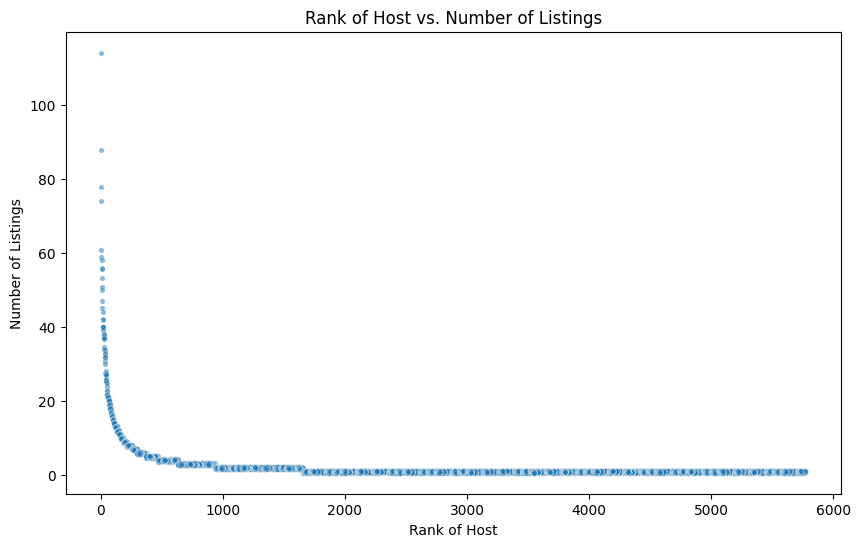

In [57]:
import numpy as np
def plot_distribution_of_hosts(listings_per_host_sorted):

    listings_per_host_sorted['rank'] = listings_per_host_sorted.index + 1
    # Create the plot
    plt.figure(figsize=(10, 6))

    # Adding jitter to the y-values
    y_values_jittered = listings_per_host_sorted['number_of_listings'] + np.random.uniform(-0.3, 0.3, size=len(
        listings_per_host_sorted))

    # Plotting with adjusted transparency
    sns.scatterplot(x=listings_per_host_sorted['rank'], y=y_values_jittered, s=15, alpha=0.5)

    # Setting labels and title
    plt.xlabel('Rank of Host')
    plt.ylabel('Number of Listings')
    plt.title('Rank of Host vs. Number of Listings')

    plt.show()

formatted_listings = getFormattedData()
listings_per_host = calculateListingsPerHost(formatted_listings)
plot_distribution_of_hosts(listings_per_host)

The initial graph shows a clear decline in the number of listings as the rank of hosts increases. 

The graph resembles a hyperbolic decay or a power-law distribution, commonly known in economics and social sciences as the Pareto distribution or the "80/20 rule". 

In this context, it indicates that a small number of hosts (the leftmost part of the graph) have a large number of listings, while the majority of hosts have very few listings. This type of distribution often appears in situations where a small proportion of entities account for a large portion of some resource or metric.

The jittered data points help in visualizing the density, but the overall graph may not provide a detailed insight into specific data points or groups, especially for hosts with fewer listings.

The `host_ranking_plot` function is a revised visualization technique to get deeper insights into the listing distribution. By taking the same sorted list of hosts and their listings, this function makes two significant adjustments:

It introduces color to represent the number of listings, adding a dimension of depth and clarity to the data points. With the color gradient, we can discern the density of listings more intuitively. It adjusts the y-axis to be segmented into three distinct scales.

In [58]:
y_ticks = list(range(0, 19, 2)) + list(range(20, 60, 10)) + list(range(60, 120, 20))

This segmentation allows us to focus on hosts with fewer listings and those in the mid-range, providing a more granular understanding of the distribution.

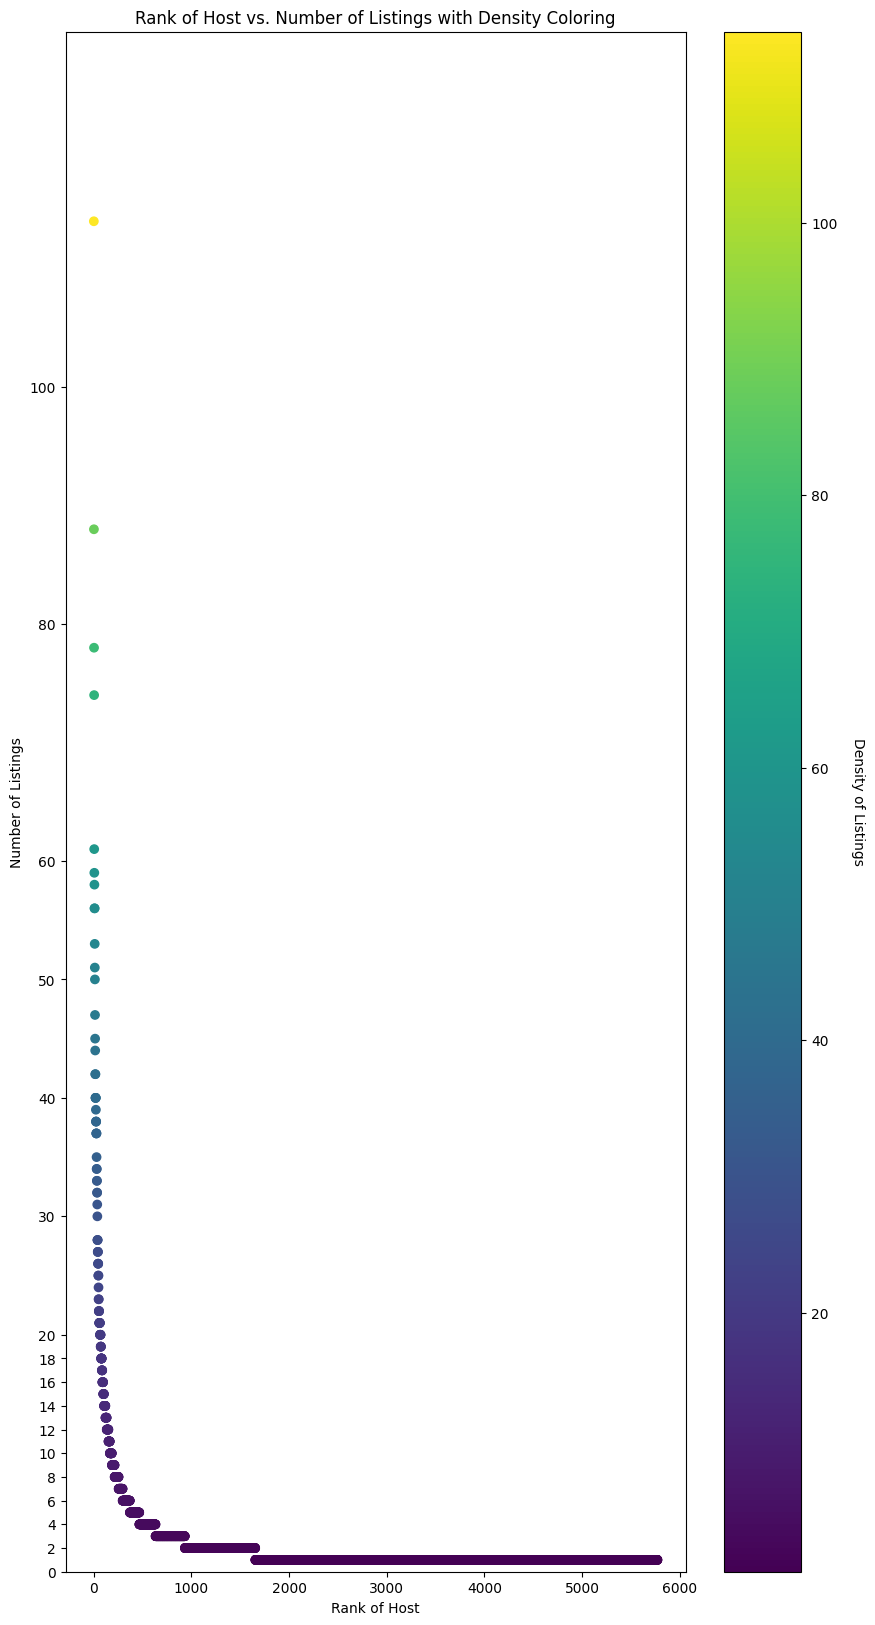

In [68]:
def host_ranking_plot(listings_per_host_sorted):

    listings_per_host_sorted['rank'] = listings_per_host_sorted.index + 1

    rank_of_host = listings_per_host_sorted['rank']

    number_of_listings = listings_per_host_sorted['number_of_listings']

    plt.figure(figsize=(10, 20))

    # Plotting the data
    plt.scatter(rank_of_host, number_of_listings, c=number_of_listings, cmap='viridis', label="Number of Listings")
    cbar = plt.colorbar()
    cbar.set_label('Density of Listings', rotation=270, labelpad=20)  # This line adds the label


    # Adjusting the y-axis
    plt.ylim(0, 130)

    y_ticks = list(range(0, 19, 2)) + list(range(20, 60, 10)) + list(range(60, 120, 20))

    plt.yticks(y_ticks)  # Set y-tick positions and labels

    # Other graph settings
    plt.title('Rank of Host vs. Number of Listings with Density Coloring')
    plt.xlabel('Rank of Host')
    plt.ylabel('Number of Listings')
    plt.show()


formatted_listings = getFormattedData()
listings_per_host = calculateListingsPerHost(formatted_listings)
host_ranking_plot(listings_per_host)

The advanced visualization offered by the revised graph paves the way for richer insights. By leveraging color differentiation, the viewer can immediately grasp the concentration of listings and identify patterns more intuitively. Furthermore, the segmented y-axis sharpens our focus on specific listing ranges, which might otherwise be overlooked in a uniform scale. This adjusted y-axis, for instance, allows us to pinpoint with precision the dense cluster of hosts who possess around 20 or fewer listings, a detail that could be crucial for certain analyses

The function `plot_distribution_of_hosts_logscale` visualizes the number of listings per host using a scatterplot, where the x-axis (representing the rank of hosts) is displayed on a logarithmic scale. Within the function, a rank is assigned to each host based on their index in the sorted dataset. A jitter is added to the y-values to reduce overlap of data points, and the points are plotted with a mild transparency to discern any overlapping data better.

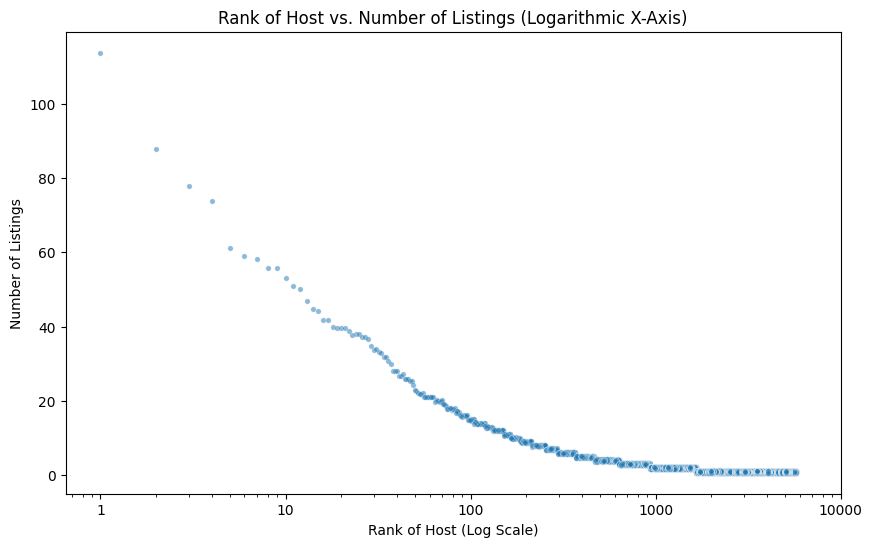

In [60]:
def plot_distribution_of_hosts_logscale(listings_per_host_sorted):
    listings_per_host_sorted['rank'] = listings_per_host_sorted.index + 1
    # Create the plot
    plt.figure(figsize=(10, 6))

    # Adding jitter to the y-values
    y_values_jittered = listings_per_host_sorted['number_of_listings'] + np.random.uniform(-0.3, 0.3, size=len(
        listings_per_host_sorted))

    # Plotting with adjusted transparency
    sns.scatterplot(x=listings_per_host_sorted['rank'], y=y_values_jittered, s=15, alpha=0.5)

    # Setting the x-axis to a logarithmic scale
    plt.xscale('log')

    # Adjusting the x-ticks for better clarity in a log scale
    plt.xticks([1, 10, 100, 1000, 10000], [1, 10, 100, 1000, 10000])

    # Setting labels and title
    plt.xlabel('Rank of Host (Log Scale)')
    plt.ylabel('Number of Listings')
    plt.title('Rank of Host vs. Number of Listings (Logarithmic X-Axis)')

    plt.show()

formatted_listings = getFormattedData()
listings_per_host = calculateListingsPerHost(formatted_listings)
plot_distribution_of_hosts_logscale(listings_per_host)

Using a logarithmic scale on the x-axis helps in visualizing datasets with a wide range, emphasizing the differences among the lower-ranked hosts. However, even with the use of a log scale, the data points are still densely clustered, especially towards the lower end of the y-axis, indicating that a significant number of hosts have a similar number of listings. This clustering can make it challenging to discern specific data points or identify any subtle trends among the majority of the hosts.

The function `host_ranking_plot_logstacale` provides a detailed visualization of the number of listings per host on a scatterplot with the x-axis displayed logarithmically. 

Here, a rank is assigned to hosts based on their index, and to reduce data point overlap, a small jitter is added to y-values. The real enhancement lies in the color-coding of each data point based on the density of nearby points. 

This density coloring helps visualize regions of high and low data concentration. Custom y-ticks are set to offer clarity at both lower and higher y-values, and the x-ticks are adjusted for a clearer representation on the log scale.

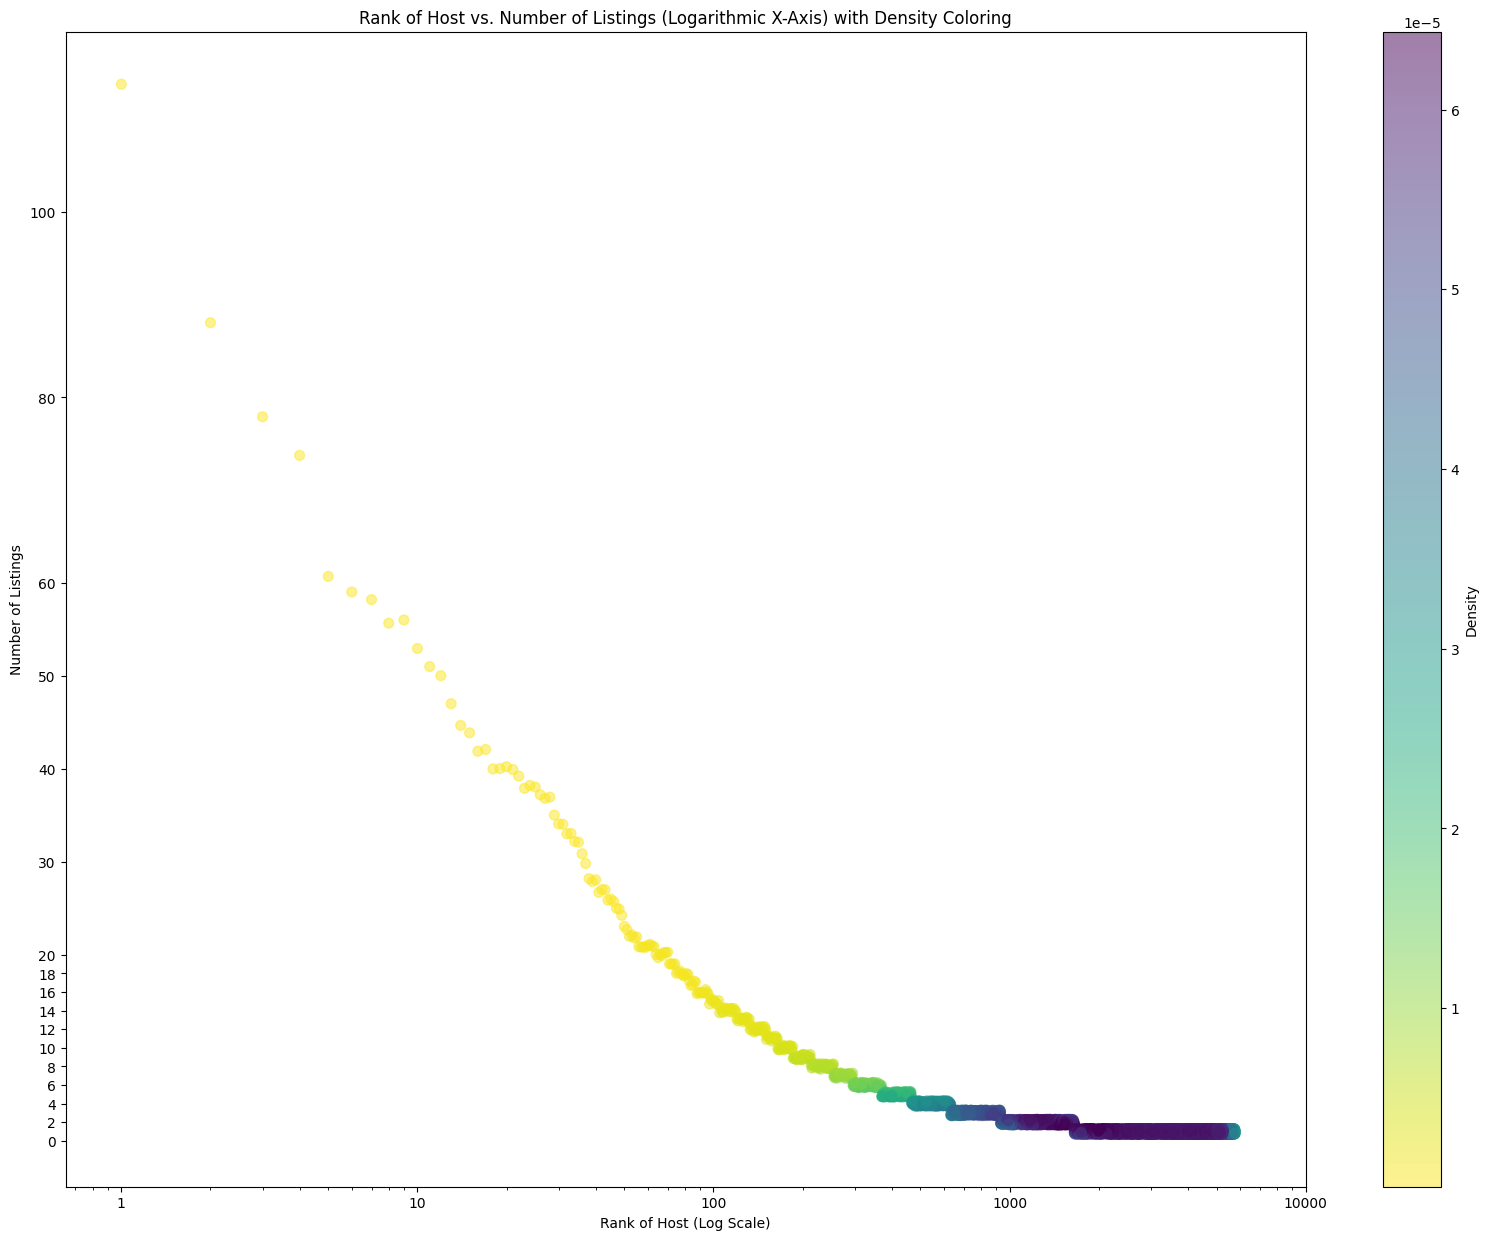

In [69]:
def host_ranking_plot_logscale(listings_per_host_sorted):
    listings_per_host_sorted['rank'] = listings_per_host_sorted.index + 1

    # Create the plot
    plt.figure(figsize=(20, 15))

    # Adding jitter to the y-values
    y_values_jittered = listings_per_host_sorted['number_of_listings'] + np.random.uniform(-0.3, 0.3, size=len(listings_per_host_sorted))

    # Calculate point densities to use for coloring
    xy = np.vstack([listings_per_host_sorted['rank'], y_values_jittered])
    z = gaussian_kde(xy)(xy)

    # Using scatter method from matplotlib for the ability to add a colorbar
    plt.scatter(listings_per_host_sorted['rank'], y_values_jittered, c=z, s=50, cmap='viridis_r', alpha=0.5)
    
    # Add a colorbar to the right of the plot
    cbar = plt.colorbar()
    cbar.set_label('Density')

    # Setting the x-axis to a logarithmic scale
    plt.xscale('log')

    y_ticks = list(range(0, 19, 2)) + list(range(20, 60, 10)) + list(range(60, 120, 20))
    plt.yticks(y_ticks)  # Set y-tick positions and labels

    # Adjusting the x-ticks for better clarity in a log scale
    plt.xticks([1, 10, 100, 1000, 10000], [1, 10, 100, 1000, 10000])

    # Setting labels and title
    plt.xlabel('Rank of Host (Log Scale)')
    plt.ylabel('Number of Listings')
    plt.title('Rank of Host vs. Number of Listings (Logarithmic X-Axis) with Density Coloring')

    plt.show()
    
formatted_listings = getFormattedData()
listings_per_host = calculateListingsPerHost(formatted_listings)
host_ranking_plot_logscale(listings_per_host)

The incorporation of density coloring makes regions of high data concentration evident. Darker points represent areas with many data points close together, while lighter points signify sparser regions. This enhanced visualization facilitates the identification of trends and patterns, especially in areas with a lot of overlap. Moreover, the adjusted y-ticks offer a clearer representation of data across different scales, ensuring that minor details in areas with fewer listings aren't overshadowed by denser regions. The custom x-ticks on the logarithmic scale provide a more intuitive understanding of host ranks, making it a more effective visualization overall.

## Visualize Listings

The `create_map` function leverages the folium library to visually represent listings on a map centered around Athens. This function takes in a dataframe named listings that contains latitude, longitude, and description columns. Initially, a base map is generated with a specified zoom level. The function then adds a `MarkerCluster` which groups nearby listings into clusters for a clean visualization. As the function processes each listing, it creates a marker and adds it to the marker cluster. Once all listings have been plotted, the map is saved as an "map.html" file for user interaction.

In [62]:
def create_map(listings):
    # Create a base map
    m = folium.Map(location=[37.9838, 23.7275],  # Coordinates for Athens
                   zoom_start=12,
                   max_zoom=15,
                   min_zoom=12)

    # Add a marker clusterer to the map
    marker_cluster = MarkerCluster().add_to(m)

    # Iterate over each listing
    for index, row in listings.iterrows():
        # Extract latitude and longitude for the current listing
        lat = row['latitude']
        lon = row['longitude']

        # Ensure that description is a string and handle possible 'nan' values
        description = str(row['description'])
        if description.lower() == 'nan':
            description = "No description available."

        # Escape special characters for HTML rendering
        cleaned_description = description.replace("'", "&#39;").replace('"', "&quot;")

        # Define a popup with desired width and minimal height
        popup_content = folium.Popup(cleaned_description, max_width=500, min_width=300)

        # Add marker to the cluster with the custom popup
        folium.Marker(
            location=[lat, lon],
            popup=popup_content,  # Using the Popup object here
            icon=None
        ).add_to(marker_cluster)

    # Save map to HTML file
    m.save("map.html")

When viewing the map, clusters represented by bubbles with numbers inside indicate the count of listings they encompass. As users zoom in or click on these clusters, they break down to reveal individual blue markers, each corresponding to a specific listing. Upon clicking any of these individual markers, a popup emerges displaying the detailed description of the respective listing.